<a href="https://colab.research.google.com/github/MohamedTolba1199/DeepLearning/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Dataset

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
pd.set_option('display.max_column',None)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.shape

(7043, 33)

In [4]:
df.drop(["CustomerID","Count"],axis=1,inplace=True)


In [5]:
df.isnull().sum()

Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
df.drop(["Churn Reason"],axis=1,inplace=True)

## More information about our dataset

In [7]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0] }).T

,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
Dtype,object,object,object,int64,object,float64,float64,object,object,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,int64,int64,int64
Num_Unique,1,1,1129,1652,1652,1652,1651,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6531,2,2,85,3438
Null_values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def column_info(data):
  cols=[]
  dtype=[]
  unique_val=[]
  n_unique=[]

  for col in df.columns:
    cols.append(col)
    dtype.append(df[col].dtypes)
    unique_val.append(df[col].unique())
    n_unique.append(df[col].nunique())

  return pd.DataFrame({'columns':cols , 'dtype':dtype , 'unique_values':unique_val , 'num_unique':n_unique})

In [9]:
column_info(df)

,columns,dtype,unique_values,num_unique
0,Country,object,[United States],1
1,State,object,[California],1
2,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
3,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652
4,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
5,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
6,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
7,Gender,object,"[Male, Female]",2
8,Senior Citizen,object,"[No, Yes]",2
9,Partner,object,"[No, Yes]",2


## Drop unnecessary data

In [10]:
df.drop(['Country','State','Lat Long','Churn Label'],axis=1,inplace=True)

In [11]:
df['Total Charges']=pd.to_numeric(df['Total Charges']  , errors='coerce')

In [12]:
#df['Total Charges'].isna().sum()
df['Total Charges'].isnull().sum()

11

In [13]:
df['Total Charges'].fillna(df['Total Charges'].mean(),inplace=True)

In [14]:
df.isna().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

## Get Categorical feuturs

In [15]:
categorical_f=[]
for col in df.columns:
  if df[col].dtypes==object:
    categorical_f.append(col)

In [16]:
pd.DataFrame(categorical_f).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method


## Label Encoding (city column)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [18]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,562,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,562,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,562,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,562,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,562,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [19]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,City,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,562,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,562,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,562,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
3,562,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
4,562,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [20]:
df.shape

(7043, 37)

<Axes: >

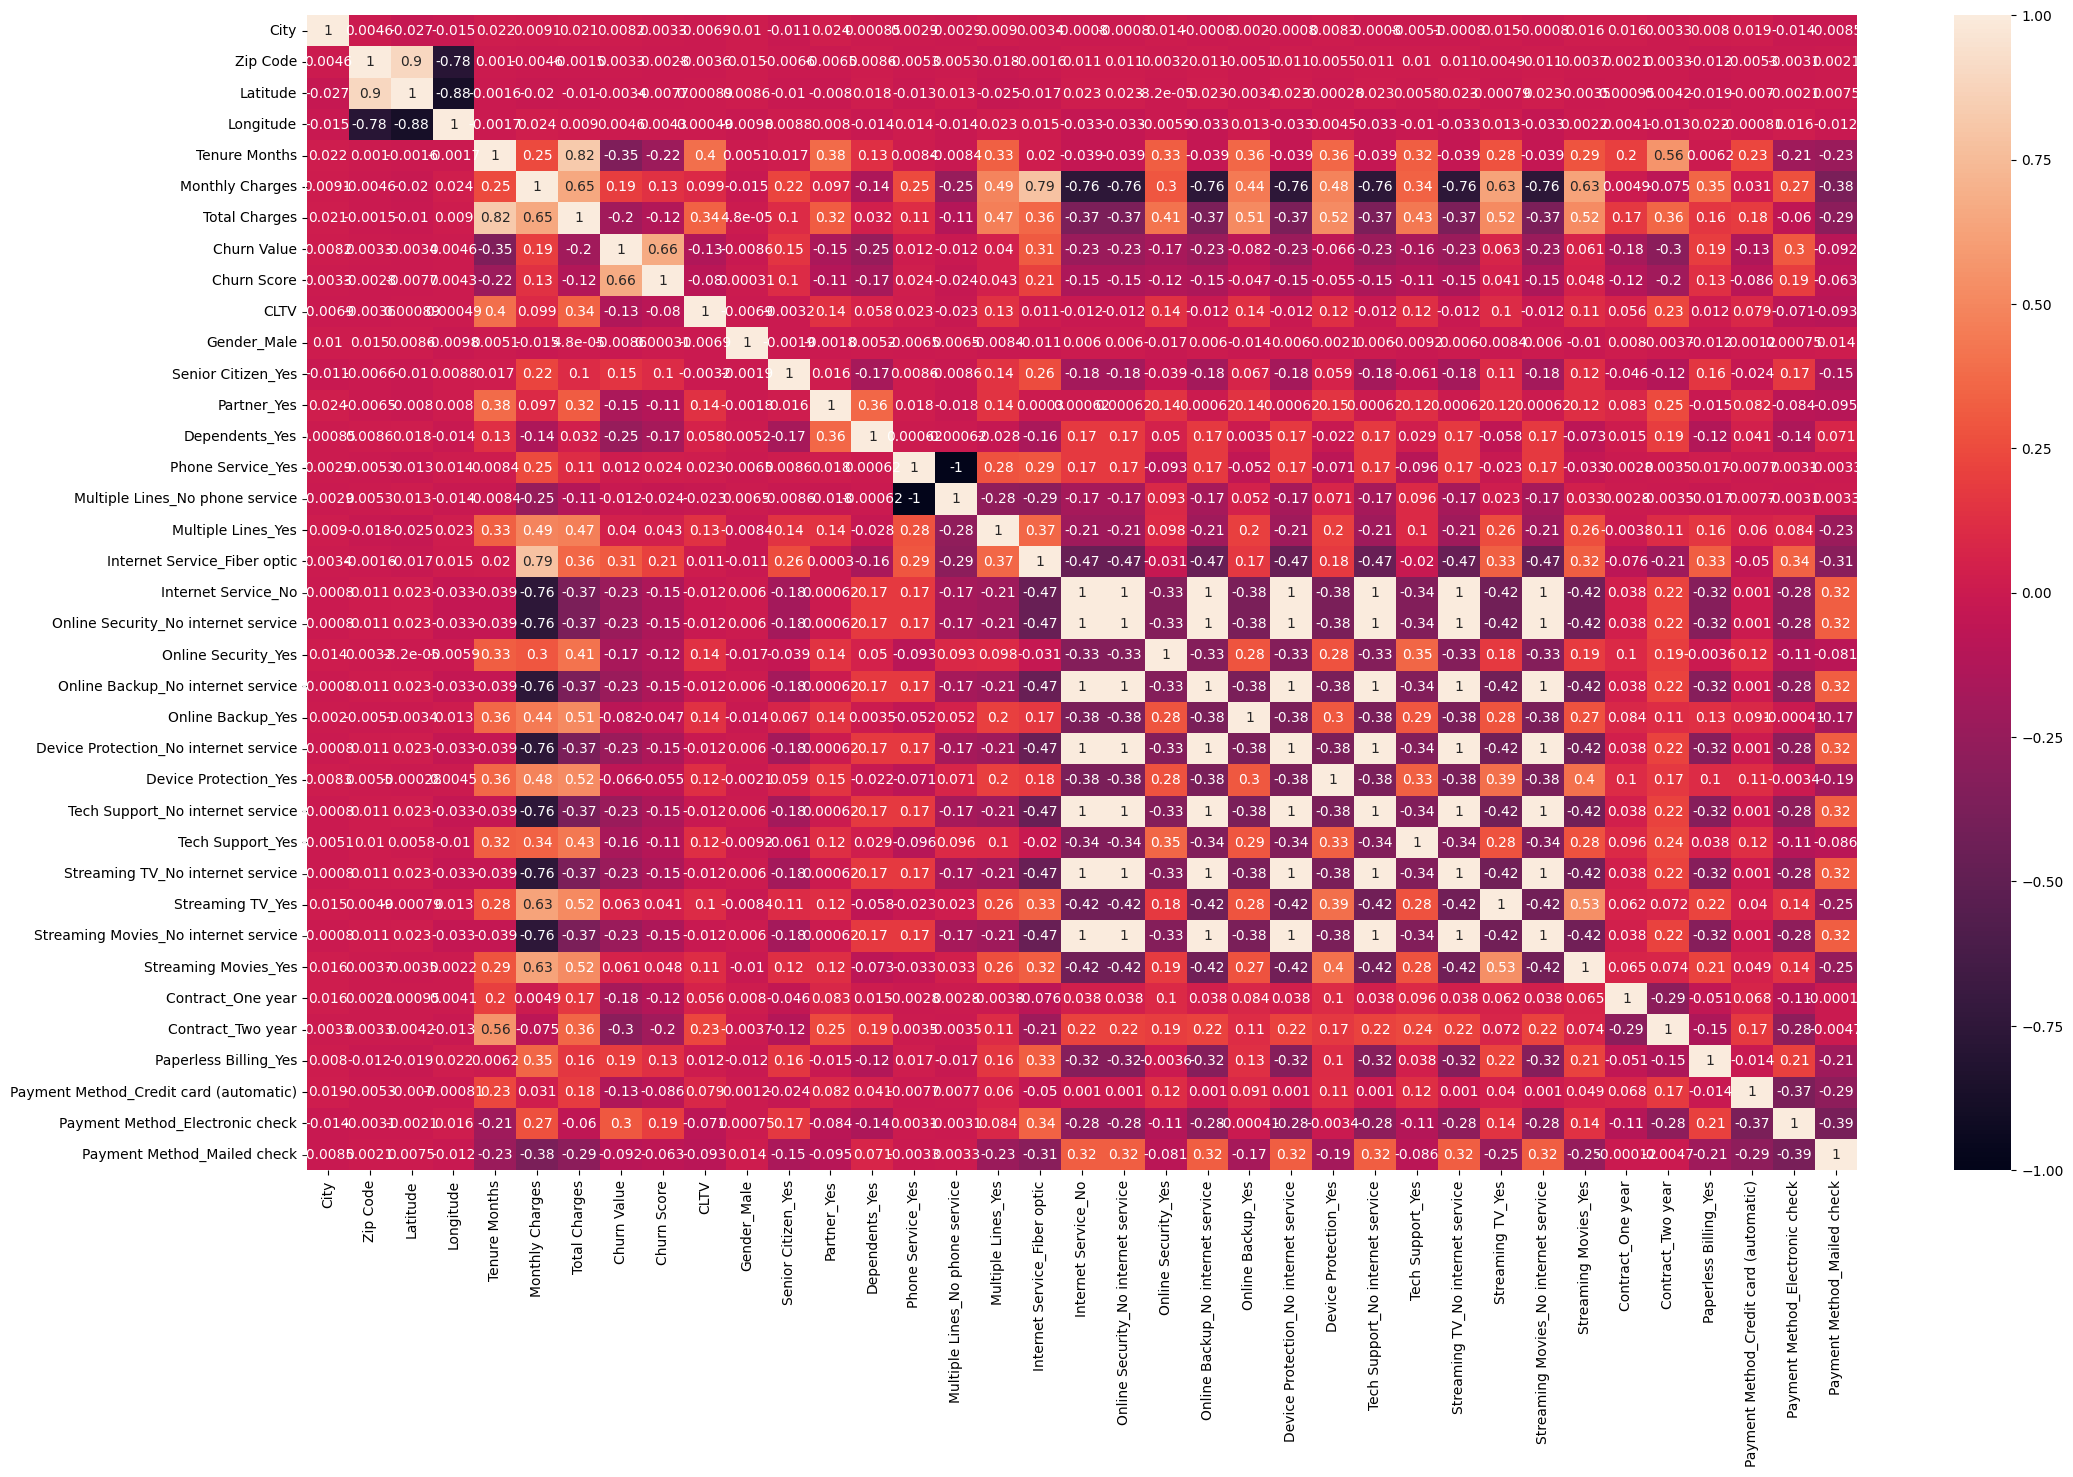

In [21]:

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

# Split Data

In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,City,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check
0,562,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,562,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,562,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
3,562,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1
4,562,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,521,92285,34.341737,-116.539416,72,21.15,1419.40,0,45,5306,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0
7039,2,92301,34.667815,-117.536183,24,84.80,1990.50,0,59,2140,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
7040,22,92304,34.559882,-115.637164,72,103.20,7362.90,0,71,5560,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0
7041,26,92305,34.167800,-116.864330,11,29.60,346.45,0,59,2793,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [23]:
y

0       1
1       0
2       0
3       0
4       0
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: Payment Method_Mailed check, Length: 7043, dtype: uint8

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

# Normilazation(Scaling)

In [25]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

#Build The Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [27]:
model=Sequential()
model.add(Dense(100,activation='relu',input_dim=X_train.shape[1])) #input Layer
model.add(Dense(50,activation='relu')) #Hidden Layer
model.add(Dropout(0.3))
model.add(Dense(20,activation='relu')) #Hidden Layer
model.add(Dense(1,activation='sigmoid')) #Output Layer

In [28]:
from tensorflow.keras.optimizers import Adam,Adagrad,RMSprop,SGD
opt = RMSprop(learning_rate = 0.001 , rho = 0.9) # learning_rate ==> Alpha , rho==>Beta

model.compile(loss='binary_crossentropy' , optimizer=opt , metrics=['accuracy'])

In [29]:

history=model.fit(X_train ,y_train , validation_split=.1 , batch_size=128 , epochs=50)

Epoch 1/50
35/35 [==============================] - 1s 12ms/step - loss: 0.4668 - accuracy: 0.7832 - val_loss: 0.3413 - val_accuracy: 0.8479
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8409 - val_loss: 0.2524 - val_accuracy: 0.8905
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2834 - accuracy: 0.8621 - val_loss: 0.2356 - val_accuracy: 0.8824
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.8634 - val_loss: 0.2137 - val_accuracy: 0.8925
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.8774 - val_loss: 0.2109 - val_accuracy: 0.8905
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.8760 - val_loss: 0.2175 - val_accuracy: 0.8905
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.8810 - val_loss: 0.2134 - val_accuracy: 0.8844
Epoch 8/50
35/35 [=

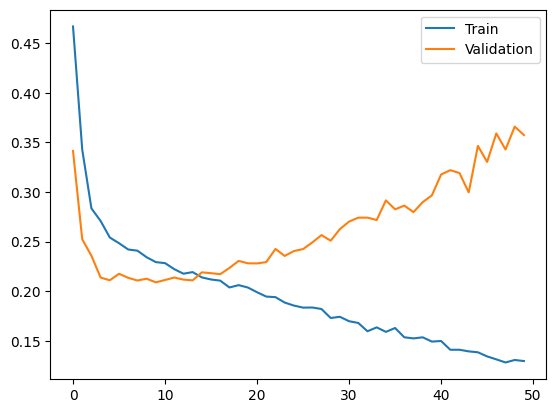

In [30]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

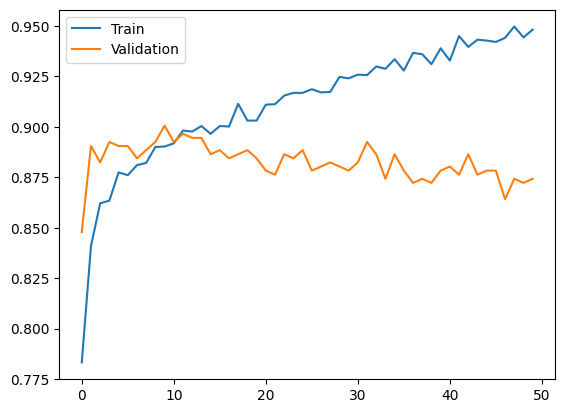

In [31]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

# Overfitting Problem

handling this problem

In [32]:
model=Sequential()
model.add(Dense(100,activation='relu',input_dim=X_train.shape[1])) #input Layer
model.add(Dense(50,activation='relu')) #Hidden Layer
model.add(Dropout(0.4))

model.add(Dense(1,activation='sigmoid')) #Output Layer

In [33]:
from tensorflow.keras.optimizers import Adam,Adagrad,RMSprop,SGD
opt = RMSprop(learning_rate = 0.001 , rho = 0.9)
model.compile(loss='binary_crossentropy' , optimizer=opt , metrics=['accuracy'])

In [34]:

history=model.fit(X_train ,y_train , validation_split=.1 , batch_size=128 , epochs=50)

Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 0.5137 - accuracy: 0.7419 - val_loss: 0.3743 - val_accuracy: 0.8438
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8267 - val_loss: 0.2917 - val_accuracy: 0.8722
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.8555 - val_loss: 0.2441 - val_accuracy: 0.8824
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.8668 - val_loss: 0.2232 - val_accuracy: 0.8986
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.8718 - val_loss: 0.2209 - val_accuracy: 0.8945
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.8731 - val_loss: 0.2154 - val_accuracy: 0.8986
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2530 - accuracy: 0.8769 - val_loss: 0.2121 - val_accuracy: 0.9006
Epoch 8/50
35/35 [=

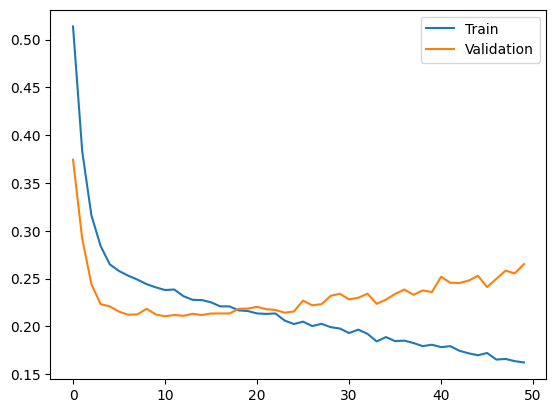

In [35]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

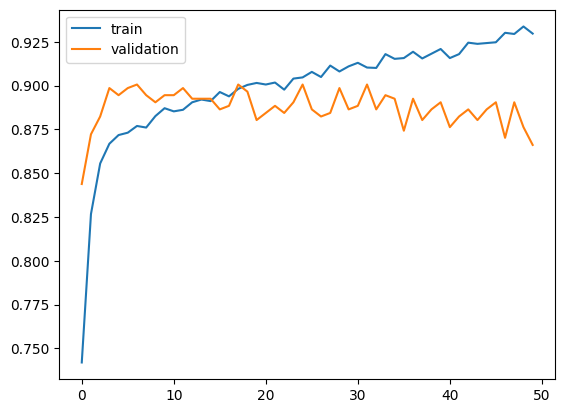

In [36]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

#Using different optimizers (momentum)

In [37]:
model=Sequential()
model.add(Dense(100,activation='relu',input_dim=X_train.shape[1])) #input Layer

model.add(Dropout(0.4))

model.add(Dense(50,activation='relu')) #Hidden Layer

model.add(Dense(1,activation='sigmoid')) #Output Layer

In [38]:
sgd_with_momentum = SGD(learning_rate=0.001 , momentum=0.4)
model.compile(loss='binary_crossentropy' , optimizer= sgd_with_momentum , metrics=['accuracy'])

In [39]:
history = model.fit(X_train,y_train ,validation_split=0.1 , batch_size=128 , epochs=50 )

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 0.7897 - accuracy: 0.4532 - val_loss: 0.6971 - val_accuracy: 0.5497
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7171 - accuracy: 0.5382 - val_loss: 0.6457 - val_accuracy: 0.6511
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.6832 - accuracy: 0.5918 - val_loss: 0.6081 - val_accuracy: 0.7079
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6432 - val_loss: 0.5798 - val_accuracy: 0.7302
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.6174 - accuracy: 0.6750 - val_loss: 0.5581 - val_accuracy: 0.7525
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7030 - val_loss: 0.5404 - val_accuracy: 0.7606
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.5745 - accuracy: 0.7162 - val_loss: 0.5261 - val_accuracy: 0.7688
Epoch 8/50
35/35 [==

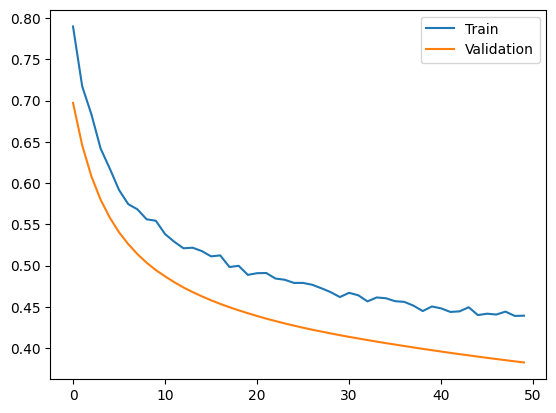

In [40]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

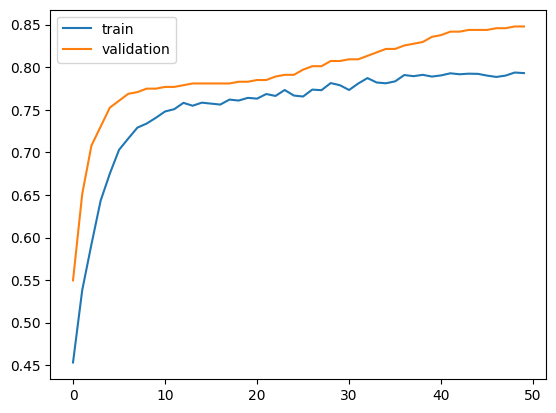

In [41]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

Using Adam

In [42]:
model=Sequential()
model.add(Dense(100,activation='relu',input_dim=X_train.shape[1])) #input Layer

model.add(Dropout(0.4))
model.add(Dense(50,activation='relu')) #Hidden Layer

model.add(Dense(1,activation='sigmoid')) #Output Layer

In [43]:
Adomy = Adam( learning_rate= 0.001, beta_1=0.9 , beta_2=0.9)
model.compile(loss='binary_crossentropy', optimizer=Adomy , metrics=['accuracy'])

In [44]:
history=model.fit(X_train , y_train, validation_split=0.1 ,batch_size=128, epochs=50)

Epoch 1/50
35/35 [==============================] - 1s 10ms/step - loss: 0.4802 - accuracy: 0.7769 - val_loss: 0.3474 - val_accuracy: 0.8540
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3682 - accuracy: 0.8323 - val_loss: 0.2707 - val_accuracy: 0.8905
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8472 - val_loss: 0.2369 - val_accuracy: 0.8945
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8549 - val_loss: 0.2210 - val_accuracy: 0.9067
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.8567 - val_loss: 0.2192 - val_accuracy: 0.9026
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.8666 - val_loss: 0.2143 - val_accuracy: 0.8986
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2635 - accuracy: 0.8722 - val_loss: 0.2126 - val_accuracy: 0.8966
Epoch 8/50
35/35 [=

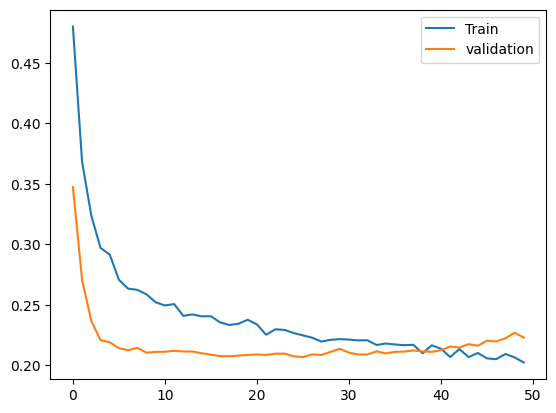

In [45]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

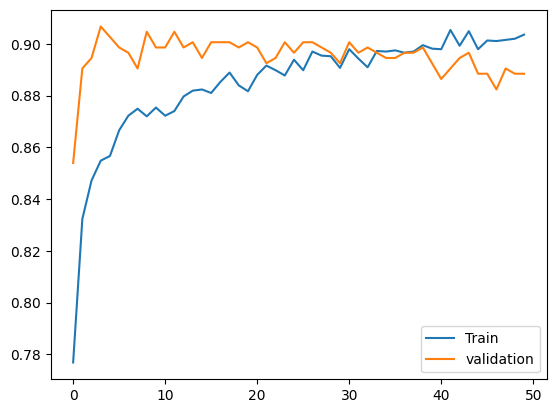

In [46]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()